# 1. imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.model_selection import TimeSeriesSplit

In [2]:
# The function calculate the average percentage difference between actual and predicted values, aiding in assessing prediction accuracy.
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
#The function predictive_metrics computes MAE, RMSE, and MAPE between actual and predicted values (y_true and y_pred) and returns these metrics along with the model's name in a DataFrame.

def predictive_metrics(y_true, y_pred,model_name):
    y_true = y_true.values
    y_pred = y_pred.values
    mae = round(mean_absolute_error(y_true, y_pred),5)
    rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)),5)
    mape = round(mean_absolute_percentage_error(y_true, y_pred),5)
    metrics = pd.DataFrame({'Model': model_name,'mae': mae, 'rmse': rmse, 'mape': mape}, index=[0])
    return metrics

# 3. Data Analysis

In [4]:
df_raw = pd.read_excel('dados_finais_gpd.xlsx')
df_raw.head()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980,5,3,-5,-2,2,8,1,6,9,...,-1,3,1,2,6,1,-2,4,0,2
1,1981,9,6,3,-2,-4,4,-6,9,9,...,0,2,-1,0,1,2,0,4,0,2
2,1982,7,3,6,-4,0,0,-3,8,8,...,1,2,-1,1,0,0,0,2,0,1
3,1983,8,1,5,-1,4,5,4,9,10,...,5,2,0,2,-3,3,1,4,-1,3
4,1984,10,2,6,1,6,10,2,11,12,...,4,4,1,2,4,5,0,7,0,5


# 3. Predictive Models

In [5]:
df1 = df_raw.copy()

In [6]:
test_years = 5
train = df1[:-test_years]
train.tail()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
39,2019,4,2,1,2,-1,5,-2,8,1,...,2,4,2,2,0,2,2,2,3,3
40,2020,-2,-4,-5,-11,-6,-20,-10,-7,-19,...,-2,-2,-6,-6,-7,-4,-3,-2,-2,-3
41,2021,10,8,3,9,1,5,10,6,17,...,7,7,5,6,7,5,5,5,5,6
42,2022,11,4,3,9,3,6,5,13,6,...,1,4,4,4,4,2,5,3,4,3
43,2023,8,2,3,1,4,6,0,6,2,...,1,4,1,1,2,1,3,2,4,3


In [7]:
test = df1[-test_years:]
test.tail()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
44,2024,9,3,3,2,4,5,2,5,1,...,2,4,1,2,2,1,4,2,4,3
45,2025,9,3,2,2,4,4,2,4,1,...,2,4,2,2,2,2,4,2,4,3
46,2026,9,3,2,2,4,3,2,4,1,...,2,4,2,2,3,2,4,2,4,3
47,2027,9,3,2,2,4,3,2,4,1,...,2,4,2,2,2,2,4,2,4,3
48,2028,9,3,2,2,4,3,2,4,1,...,2,4,1,2,2,2,4,2,4,3


### Season decomposition - additive model

In [8]:
country = 'Brazil'

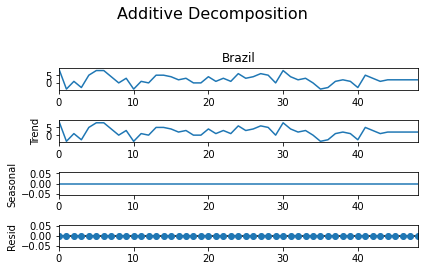

In [9]:
decomposition = seasonal_decompose(df1[country], model='additive', period=1)

decomposition.plot().suptitle('Additive Decomposition', fontsize=16);
plt.tight_layout(rect=[0, 0.05, 1, 0.95]);

In [10]:
from statsmodels.tsa.stattools import adfuller

stationary_series = []
non_stationary_series = []

for series in df1.columns:

    country_data = df1[[series]]

    # Realizando o teste ADF
    result = adfuller(country_data)

    if result[1] <= 0.05:
        # print("A série é estacionária.")
        stationary_series.append(series) 
    else:
        # print("A série não é estacionária.")
        non_stationary_series.append(series)  


In [11]:
print("% stationary_series:",(len(stationary_series)/len(df1.columns)*100))
print("% non_stationary_series:",(len(non_stationary_series)/len(df1.columns)*100))

% stationary_series: 81.93832599118943
% non_stationary_series: 18.06167400881057


### 3.1 Exponencial smoothing

Exponential smoothing is a technique used in time series analysis to make forecasts based on past data patterns. It involves assigning weights to past values, where the weights decrease exponentially as the values become older. This implies that recent values have a greater impact on the forecast than older values.


The Holt-Winters method takes into account three main components: trend, seasonality and level.

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [13]:
model_hot_winter = ExponentialSmoothing(
    endog=train[country],  #Using specific country training data
    trend='add',
    seasonal='add',
    seasonal_periods=8,
).fit()

In [14]:
prediction_hot_winter = model_hot_winter.forecast(test.shape[0])

In [15]:
train_reset = train.reset_index()
test_reset = test.reset_index()

<AxesSubplot:>

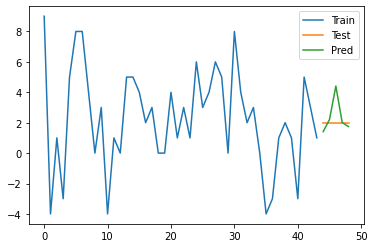

In [16]:
train[country].plot(legend=True, label='Train')
test[country].plot(legend=True, label='Test')
prediction_hot_winter.plot(legend=True, label='Pred')

#### Metrics for model evaluation

In [17]:
predictive_metrics(test['Brazil'], prediction_hot_winter, 'Holt-Winters')

,Model,mae,rmse,mape
0,Holt-Winters,0.69482,1.1191,34.74095


These statistics are used to evaluate the performance of a prediction model against actual data. Smaller values ​​for MAE and RMSE indicate better performance, while for MAPE, depending on the context, but lower values ​​are also desirable.


The MAE and RMSE are relatively low, indicating that the model's predictions have a small mean and mean squared error. On the other hand, the MAPE is considerably high, suggesting that the model has a significant absolute percentage error in its predictions.

### 3.2 Auto Arima

The ARIMA (AutoRegressive Integrated Moving Average) model is a time series forecasting method that combines autoregressive (AR), moving average (MA) and differencing (I) components to deal with different patterns in temporal data. ARIMA is widely used for short-term forecasting of time series and is an extension of the ARMA (AutoRegressive Moving Average) model that also incorporates differentiation to deal with non-stationary series.

In [18]:
pip install pmdarima

In [19]:
from pmdarima.arima import auto_arima

In [20]:
model_sarimax = auto_arima(
    y = train['Brazil'],
    m=1,
    test='adf',
    seasonal=False,
    stepwise=True,
    d=0,
    start_p=0,
    max_p=4,
    start_q=0,
    max_q=4,
)

In [21]:
pred_sarimax = model_sarimax.predict(test.shape[0])
pred_sarimax

44    2.272727
45    2.272727
46    2.272727
47    2.272727
48    2.272727
dtype: float64

<AxesSubplot:>

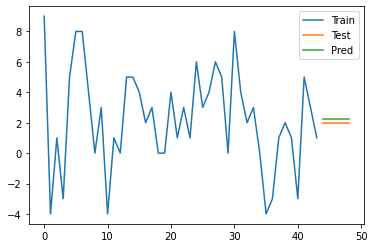

In [22]:
train['Brazil'].plot(legend=True, label='Train')
test['Brazil'].plot(legend=True, label='Test')
pred_sarimax.plot(legend=True, label='Pred')

In [23]:
metrics_sarimax = predictive_metrics(test[country], pred_sarimax, 'sarimax')
metrics_sarimax

,Model,mae,rmse,mape
0,sarimax,0.27273,0.27273,13.63636


It is observed that the MAE and RMSE are the same, which may suggest that the model is managing to predict the average of the data well, but perhaps it is not capturing the variations in the real values well. An MAPE of 13.6% can be considered reasonable, especially when dealing with economic or financial data, where percentage changes can be normal.

### 3.3 Simple exponential smoothing

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [25]:
model_ses = SimpleExpSmoothing(train['Brazil'])  # model initialization
model_ses_fit = model_ses.fit(smoothing_level=0.2, optimized=True)  #model fit

pred_ses = model_ses_fit.forecast(steps=test.shape[0])  # Forecast with the fitted model


<AxesSubplot:>

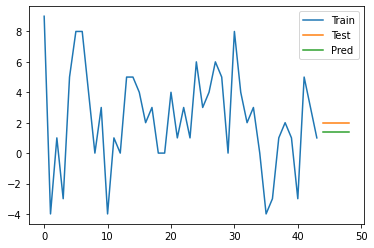

In [26]:
train['Brazil'].plot(legend=True, label='Train')
test['Brazil'].plot(legend=True, label='Test')
pred_ses.plot(legend=True, label='Pred')

In [27]:
metrics_ses = predictive_metrics(test[country], pred_ses, 'Simple Exponential Smoothing')
metrics_ses

,Model,mae,rmse,mape
0,Simple Exponential Smoothing,0.6026,0.6026,30.13018


### 4. Forecast for all countries

In [28]:
df2 = df_raw.copy()

In [29]:
test_years = 5
train = df2[:-test_years]
test = df2[-test_years:]

### 4.1 Auto Arima

The function creates forecasts for various time series (countries) using the automatically adjusted SARIMA model. For each country, it configures the model with specific parameters and generates forecasts. The forecasts are stored in a DataFrame called df_predict_sarimax, where each column contains the forecasts for one country. This makes it easier to analyze forecasts made for multiple countries

In [30]:
df_pred_sarimax = pd.DataFrame()
for country in df2.columns:
    
    model_sarimax = auto_arima(
        train[country],
        m=1,
        test='adf',
        seasonal=False,
        stepwise=True,
        d=0,
        start_p=0,
        max_p=1,
        start_q=0,
        max_q=1,
    )
    
    pred_sarimax = model_sarimax.predict(test.shape[0])
    df_pred_sarimax = pd.concat([df_pred_sarimax, pd.DataFrame(pred_sarimax, columns=[country])], axis=1)

In [31]:
df_pred_sarimax

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
44,2023.848320,8.090909,3.492256,2.597927,0.346023,4.323705,4.101702,1.795455,6.636364,2.453309,...,1.422512,4.058823,1.363636,1.863636,2.363636,2.068182,3.092753,2.833347,3.470538,3.386364
45,2024.542242,8.090909,2.843299,2.466135,0.119732,4.505690,3.427610,1.795455,6.636364,2.406120,...,1.638791,4.080355,1.363636,1.863636,2.363636,2.068182,3.140219,2.879484,3.366523,3.386364
46,2025.234669,8.090909,2.843299,2.422935,0.041430,4.608002,3.427610,1.795455,6.636364,2.359838,...,1.749501,4.098806,1.363636,1.863636,2.363636,2.068182,3.164510,2.922895,3.265626,3.386364
47,2025.925604,8.090909,2.843299,2.408775,0.014336,4.665521,3.427610,1.795455,6.636364,2.314446,...,1.806172,4.114616,1.363636,1.863636,2.363636,2.068182,3.176941,2.963741,3.167752,3.386364
48,2026.615050,8.090909,2.843299,2.404134,0.004960,4.697858,3.427610,1.795455,6.636364,2.269928,...,1.835181,4.128162,1.363636,1.863636,2.363636,2.068182,3.183303,3.002174,3.072812,3.386364


#### Evaluating model results

In [32]:
def predictive_metrics(y_true, y_pred,model_name, country):
    y_true = y_true.values
    y_pred = y_pred.values
    mae = round(mean_absolute_error(y_true, y_pred),5)
    rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)),5)
    mape = round(mean_absolute_percentage_error(y_true, y_pred),5)
    metrics = pd.DataFrame({'Country':country,'Model': model_name,'mae': mae, 'rmse': rmse, 'mape': mape}, index=[0])
    return metrics

In [33]:
df_metrics_sarimax = pd.DataFrame()

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

for country in df_pred_sarimax.columns:
    metrics_sarimax = predictive_metrics(test[country], df_pred_sarimax[country], 'sarimax',country)
    df_metrics_sarimax = pd.concat([df_metrics_sarimax, metrics_sarimax], axis=0)


In [34]:
df_metrics_sarimax.sort_values(by='mae', ascending=False).head(20)

,Country,Model,mae,rmse,mape
0,Guyana,sarimax,20.50372,24.36338,626.52649
0,Lebanon,sarimax,12.21178,12.31311,93.93679
0,Iraq,sarimax,11.49069,11.58929,507.71997
0,Libya,sarimax,7.83192,8.94576,120.39900
0,Macao SAR,sarimax,6.65210,7.58530,141.58336
0,Venezuela,sarimax,6.25454,6.75641,95.30740
0,"South Sudan, Republic of",sarimax,5.61203,5.63493,127.83390
0,Yemen,sarimax,5.40000,5.67450,100.00000
0,Mozambique,sarimax,4.76561,6.62311,36.24970
0,Sri Lanka,sarimax,4.73305,4.74458,171.39788


<AxesSubplot:>

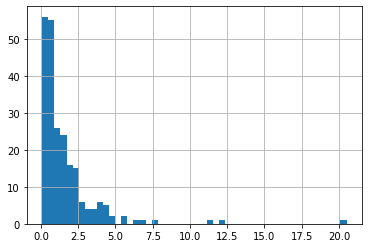

In [35]:
df_metrics_sarimax['mae'].hist(bins=50)

In [36]:
df_metrics_sarimax['mae'].agg(['mean','median','std'])

mean      1.56899
median    0.92033
std       2.06968
Name: mae, dtype: float64

### 4.1 Simple Smooting

In [37]:
df_forecasts_ses = pd.DataFrame()
for country in df2.columns:
    # Simple exponential smoothing
    model_ses = SimpleExpSmoothing(
        train[country],
        initialization_method='estimated',                              
    ).fit(smoothing_level=0.7, optimized=True)
    
    # Forecast using the SES model
    pred_ses = model_ses.forecast(test.shape[0])
    df_forecasts_ses = pd.concat([df_forecasts_ses, pd.DataFrame(pred_ses, columns=[country])], axis=1)

In [38]:
df_metrics_ses = pd.DataFrame()
for country in df_forecasts_ses.columns:
    metrics_ss = predictive_metrics(test[country], df_forecasts_ses[country], 'simple smothing',country)
    df_metrics_ses = pd.concat([df_metrics_ses, metrics_ss], axis=0)

In [39]:
df_metrics_ses.sort_values(by='mae', ascending=False).head(20)

,Country,Model,mae,rmse,mape
0,Macao SAR,simple smothing,27.80925,28.64532,6.701830e+02
0,Guyana,simple smothing,24.42970,29.58141,7.649348e+02
0,Venezuela,simple smothing,9.00913,9.99022,1.345354e+02
0,Sri Lanka,simple smothing,6.66907,6.68106,2.418660e+02
0,Caribbean,simple smothing,6.37930,6.64442,2.486194e+02
0,Yemen,simple smothing,5.19202,5.47696,9.524628e+01
0,Mozambique,simple smothing,5.13334,6.88413,4.113586e+01
0,Libya,simple smothing,4.83391,5.05240,8.757654e+01
0,Ireland,simple smothing,4.36349,4.39090,1.329046e+02
0,Moldova,simple smothing,3.89695,3.91743,8.103605e+01


<AxesSubplot:>

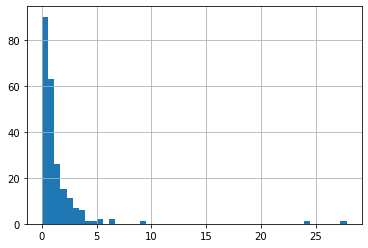

In [40]:
df_metrics_ses['mae'].hist(bins=50)

In [41]:
df_metrics_ses['mae'].agg(['mean','median','std'])

mean      1.366262
median    0.725910
std       2.643208
Name: mae, dtype: float64

### Comparing model performance using MAE

The following calculation is comparing performance statistics between two methods (Simple Exponential Smoothing and SARIMA) using the MAE metric. The resulting DataFrame, df_performance_results, contains the calculated statistics, including mean, median, standard deviation, minimum, maximum, and the coefficient of variation. Minimum values ​​in each column are highlighted in light green for quick viewing. This helps to evaluate and compare the performance of forecasting methods.

In [42]:
df_performance_results = pd.DataFrame()

metric = 'mae'

statistics = [
    'mean',
    'median',
    'std',
    'min',
    'max',
]
df_performance_results = pd.concat([df_performance_results, df_metrics_ses[metric].agg([statistics])], axis=1)
df_performance_results = pd.concat([df_performance_results, df_metrics_sarimax[metric].agg([statistics])], axis=1)
df_performance_results.columns = ['smoothing','sarimax']
df_performance_results = df_performance_results.T
df_performance_results['cv'] = df_performance_results['std'] / df_performance_results['mean']  
df_performance_results.style.highlight_min(color='lightgreen', axis=0)

,mean,median,std,min,max,cv
smoothing,1.366262,0.725910,2.643208,0.026380,27.809250,1.934627
sarimax,1.568990,0.920330,2.069680,0.085690,20.503720,1.319116


Although the Simple Exponential Smoothing (SES) method has a slightly lower MAE mean and median, it is important to note that the coefficient of variation (CV) is significantly higher compared to SARIMA. This suggests that SES may be more volatile compared to SARIMA.

### Comparing model performance using RMSE

In this section, we are evaluating and comparing the performance of two forecasting methods: Simple Exponential Smoothing (SES) and SARIMA, using the Mean Squared Error (RMSE) metric. This analysis will help us understand how the SES and SARIMA methods compare in terms of performance, considering different statistics and the coefficient of variation. 

In [43]:
df_final_metrics = pd.DataFrame()
metric = 'rmse'

statistics = [
    'mean',
    'median',
    'std',
    'min',
    'max',
]
df_final_metrics = pd.concat([df_final_metrics, df_metrics_ses[metric].agg([statistics])], axis=1)
df_final_metrics = pd.concat([df_final_metrics, df_metrics_sarimax[metric].agg([statistics])], axis=1)
df_final_metrics.columns = ['simple_smoothing','sarimax']
df_final_metrics = df_final_metrics.T
df_final_metrics['cv'] = df_final_metrics['std'] / df_final_metrics['mean']
df_final_metrics.style.highlight_min(color='lightgreen', axis=0)

,mean,median,std,min,max,cv
simple_smoothing,1.470006,0.773460,2.922559,0.026380,29.581410,1.988127
sarimax,1.690836,0.990060,2.309001,0.099240,24.363380,1.365597


Considering the mean, median and coefficient of variation statistics, the Simple Smoothing method seems to perform slightly better than the SARIMA method for this data set.

### 5.0 cross validation

### 5.1 Simple smothing

The code performs a temporal validation to evaluate the performance of an SES model in different countries, calculating statistics such as MAE and associated statistics. The CV is calculated to understand the variability of the errors in relation to the average of the errors. The histogram helps to visualize the distribution of errors.

mean mae for all countries 3.8394988726306645
median mae for all countries 3.1548407306685995
std mae for all countries 2.507009043451563
std mae for all countries 22.097959380503532
std mae for all countries 1.0374954106167575
cv mae for all countries 0.6529521499074864


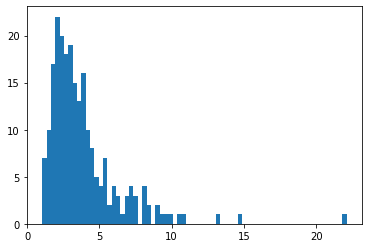

In [44]:
df_final_metrics_cv = pd.DataFrame()

metric = 'mae'

statistics = [
    'mean',
    'median',
    'std',
    'min',
    'max'
]

n_splits = 5 
tscv = TimeSeriesSplit(n_splits=n_splits)

for country in df2.columns:
    final_metrics_cv = pd.DataFrame()
    for train_idx, test_idx in tscv.split(train[country]):
        train_data = train[country].iloc[train_idx]
        test_data = train[country].iloc[test_idx]
        
        model_ses = SimpleExpSmoothing(train_data, initialization_method='estimated').fit()
        
        forecast = model_ses.forecast(len(test_data))
        
        mae = mean_absolute_error(test_data, forecast)
        
        final_metrics_cv = pd.concat([final_metrics_cv, pd.DataFrame({country: [mae]})], ignore_index=True)
    df_final_metrics_cv = pd.concat([df_final_metrics_cv, final_metrics_cv], axis=1)


aux = df_final_metrics_cv.mean()

print("mean mae for all countries",aux.values.mean())
print("median mae for all countries",np.median(aux.values))
print("std mae for all countries",aux.values.std())
print("std mae for all countries",aux.values.max())
print("std mae for all countries",aux.values.min())
print("cv mae for all countries",aux.values.std() / aux.values.mean())
plt.hist(aux.values, bins=70);

### 5.2 Auto arima

mean mae for all countries 3.708337123709953
median mae for all countries 3.0778978697556445
std mae for all countries 2.297924657621875
std mae for all countries 17.952735291792916
std mae for all countries 1.0972500810132322
cv mae for all countries 0.6196644428387214


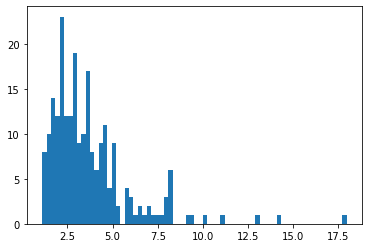

In [45]:
df_final_metrics_cv = pd.DataFrame()

n_splits = 5

tscv = TimeSeriesSplit(n_splits=n_splits)

for country in df2.columns:
    final_metrics_cv = pd.DataFrame()
    for train_idx, test_idx in tscv.split(train[country]):
        train_data = train[country].iloc[train_idx]
        test_data = train[country].iloc[test_idx]
        model_sarimax = auto_arima(
            train_data,
            m=1,
            test='adf',
            seasonal=False,
            stepwise=True,
            d=0,
            start_p=0,
            max_p=1,
            start_q=0,
            max_q=1,
        )
            
            
        pred_sarimax = model_sarimax.predict(len(test_data))
        mae = mean_absolute_error(test_data, pred_sarimax)
        final_metrics_cv = pd.concat([final_metrics_cv, pd.DataFrame({country: [mae]})], ignore_index=True)
    df_final_metrics_cv = pd.concat([df_final_metrics_cv, final_metrics_cv], axis=1)

aux = df_final_metrics_cv.mean()

print("mean mae for all countries",aux.values.mean())
print("median mae for all countries",np.median(aux.values))
print("std mae for all countries",aux.values.std())
print("std mae for all countries",aux.values.max())
print("std mae for all countries",aux.values.min())
print("cv mae for all countries",aux.values.std() / aux.values.mean())
plt.hist(aux.values, bins=70);

In [46]:
mean_absolute_error(test_data, pred_sarimax)

1.6488157904111322

7.1 train test split

In [59]:
df3 = df_raw.copy()

In [60]:
test_years = 5
train = df3.iloc[:-test_years]  # Exclui as últimas linhas de teste
test = df3.iloc[-test_years:]    # Seleciona as últimas linhas de teste

In [73]:
parmans = {
    'smoothing_level': 0.1 
}

predict = pd.DataFrame()
for country in train.columns:
    if country != 'year':  # Verifica se a coluna não é 'year'
        model = SimpleExpSmoothing(
            train[country]
        ).fit(
            smoothing_level=parmans['smoothing_level'], 
            optimized=False
        )

        forecast = model.forecast(steps=len(test))

        predict = pd.concat([predict, pd.DataFrame(forecast, columns=[country])], axis=1)
    else:
        predict = pd.concat([predict, test['year']], axis=1)  # Inclui 'year' no DataFrame de previsões


In [74]:
predict

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
44,2024,6.429014,3.108636,2.114931,1.249844,2.7338,2.17562,1.431818,5.398198,2.435095,...,2.454139,4.43047,1.421391,1.638044,1.891699,1.540559,3.274722,2.746606,3.607995,3.179126
45,2025,6.429014,3.108636,2.114931,1.249844,2.7338,2.17562,1.431818,5.398198,2.435095,...,2.454139,4.43047,1.421391,1.638044,1.891699,1.540559,3.274722,2.746606,3.607995,3.179126
46,2026,6.429014,3.108636,2.114931,1.249844,2.7338,2.17562,1.431818,5.398198,2.435095,...,2.454139,4.43047,1.421391,1.638044,1.891699,1.540559,3.274722,2.746606,3.607995,3.179126
47,2027,6.429014,3.108636,2.114931,1.249844,2.7338,2.17562,1.431818,5.398198,2.435095,...,2.454139,4.43047,1.421391,1.638044,1.891699,1.540559,3.274722,2.746606,3.607995,3.179126
48,2028,6.429014,3.108636,2.114931,1.249844,2.7338,2.17562,1.431818,5.398198,2.435095,...,2.454139,4.43047,1.421391,1.638044,1.891699,1.540559,3.274722,2.746606,3.607995,3.179126
